In [1]:
from _kedro_init import init_kedro

catalog, pipelines = init_kedro()
df_cards = catalog.load("all_mtg_cards")
df_decks = catalog.load("standard_decks")

print(df_cards.shape, df_decks.shape)

[11/03/25 00:24:06] INFO     Using                                                                  ]8;id=422675;file://c:\Users\xxama\Proyectos\kedro_mtg\venv\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=865984;file://c:\Users\xxama\Proyectos\kedro_mtg\venv\Lib\site-packages\kedro\framework\project\__init__.py#270\270]8;;\
                             'c:\Users\xxama\Proyectos\kedro_mtg\venv\Lib\site-packages\kedro\frame                
                             work\project\rich_logging.yml' as logging configuration.                              

[11/03/25 00:24:13] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=794445;file://c:\Users\xxama\Proyectos\kedro_mtg\venv\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=701065;file://c:\Users\xxama\Proyectos\kedro_mtg\venv\Lib\site-packages\kedro_telemetry\plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

🚀 Kedro cargado correctamente
📦 Datasets disponibles: []
🧩 Pipelines registrados: ['data_prep', 'classification', 'regression', 'classification_full', 'regression_full', '__default__']


[11/03/25 00:24:15] INFO     Loading data from all_mtg_cards (CSVDataset)...                   ]8;id=978063;file://c:\Users\xxama\Proyectos\kedro_mtg\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=600955;file://c:\Users\xxama\Proyectos\kedro_mtg\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

[11/03/25 00:24:21] INFO     Loading data from standard_decks (CSVDataset)...                  ]8;id=170530;file://c:\Users\xxama\Proyectos\kedro_mtg\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=328642;file://c:\Users\xxama\Proyectos\kedro_mtg\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

(93643, 39) (962, 7)


# 🧠 Proyecto: Predicción y Optimización de Mazos Estándar de MTG
**Autor:** Amaro Rodriguez  
**Fecha:** 2025  
**Metodología:** CRISP-DM  
**Versión:** 2.0 - Features Avanzadas y Modelos Duales

---

## Índice
1️⃣ Comprensión del Negocio  
2️⃣ Comprensión de los Datos  
3️⃣ Preparación de los Datos (Features Avanzadas)  
4️⃣ Modelado - Clasificación Binaria  
5️⃣ Modelado - Regresión (Competitiveness Score)  
6️⃣ Evaluación Comparativa  
7️⃣ Despliegue y Conclusiones

### 🎯 Objetivo General
Analizar y predecir la competitividad de mazos estándar de *Magic: The Gathering* (MTG) utilizando **30+ features avanzadas** de ingeniería, incluyendo curva de maná detallada, porcentajes de tipos de cartas, keywords en texto, eficiencia de maná y composición de colores.

### 🔍 Problemas de Negocio
- ¿Qué factores determinan si un mazo es competitivo (Tier 1-2)?  
- ¿Cómo influye la curva de maná (promedio, varianza) en el rendimiento?  
- ¿Qué porcentaje de tipos de cartas (criaturas, instants, sorceries) es más efectivo?  
- ¿Cómo afectan las keywords (removal, draw, ramp, counter, lifegain) al éxito?
- ¿Cuál es el score de competitividad continuo (0.0-1.0) de un mazo?

### 🎯 Objetivos Específicos
1. **Clasificación Binaria**: Predecir si un mazo es **competitivo** (Tier 1-2) o no
   - Target: `competitive` (binario: 0 o 1)
   - Modelos: LogisticRegression, SVC, RandomForest, XGBoost, KNN
   - Métricas: Accuracy, F1 Score, ROC AUC

2. **Regresión**: Predecir el **Competitiveness Score** continuo (0.0-1.0)
   - Target: `competitiveness_score` (continuo)
   - Modelos: LinearRegression, Ridge, SVR, RandomForestRegressor, XGBRegressor
   - Métricas: R², MAE, RMSE

3. **Feature Engineering Avanzado**: 30+ features incluyendo:
   - Curva de maná (avg, std, var CMC)
   - Porcentajes de tipos (% creatures, instants, sorceries, planeswalkers, etc.)
   - Keywords en texto (% removal, draw, ramp, counter, lifegain)
   - Cuerpo de mesa (avg power/toughness ponderado)
   - Mana Efficiency Score ((power+toughness)/cmc ponderado)
   - Identidad de color detallada (mono, 2-color, 3+)
   - Power Score agregado del mazo

In [2]:
# 2. Comprensión de los Datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


print("📦 Librerías cargadas correctamente:", datetime.now())

📦 Librerías cargadas correctamente: 2025-11-03 00:24:22.572984


In [3]:
# Carga de datasets
cards = pd.read_csv("../data/01_raw/all_mtg_cards.csv")
decks = pd.read_csv("../data/01_raw/standard_decks.csv")

print(f"Cartas: {cards.shape}")
print(f"Mazos: {decks.shape}")

Cartas: (93643, 39)
Mazos: (962, 7)


In [4]:
# Vista previa
display(cards.head(3))
display(decks.head(3))

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550.0,normal,NaN,{5}{W}{W},7.0,['W'],['W'],Creature — Human Cleric,NaN,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","['10E', 'JUD', 'UMA']",First strike\nWhen Ancestor's Chosen comes int...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,NaN,normal,NaN,{5}{W}{W},7.0,['W'],['W'],Creature — Human Cleric,NaN,...,NaN,"['10E', 'JUD', 'UMA']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465.0,normal,NaN,{4}{W},5.0,['W'],['W'],Creature — Angel,NaN,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...","Flying\nWhen Angel of Mercy comes into play, y...",Creature - Angel,"[{'format': 'Brawl', 'legality': 'Legal'}, {'f...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c


,Year,Month,Tier,Name,Author name,Deck link,Deck list
0,2022,8,1,Jeskai Hinata,Mastikor,https://www.mtgtop8.com/event?e=38039&d=484531...,2 Deserted Beach\r\n1 Hall of Storm Giants\r\n...
1,2022,8,2,Esper Raffine,Check Onetwoxo,https://www.mtgtop8.com/event?e=38039&d=484533...,4 Brightclimb Pathway\r\n4 Clearwater Pathway\...
2,2022,8,2,Boros Aggro,Pedro Moura,https://www.mtgtop8.com/event?e=38039&d=484532...,1 Cave of the Frost Dragon\r\n2 Den of the Bug...


In [5]:
cards.info()
print("\n")
decks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93643 entries, 0 to 93642
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            93643 non-null  object 
 1   multiverse_id   63808 non-null  float64
 2   layout          93643 non-null  object 
 3   names           0 non-null      float64
 4   mana_cost       81265 non-null  object 
 5   cmc             93643 non-null  float64
 6   colors          73235 non-null  object 
 7   color_identity  83172 non-null  object 
 8   type            93643 non-null  object 
 9   supertypes      16578 non-null  object 
 10  subtypes        57619 non-null  object 
 11  rarity          93643 non-null  object 
 12  text            92548 non-null  object 
 13  flavor          46752 non-null  object 
 14  artist          93634 non-null  object 
 15  number          93643 non-null  object 
 16  power           44452 non-null  object 
 17  toughness       44452 non-null 

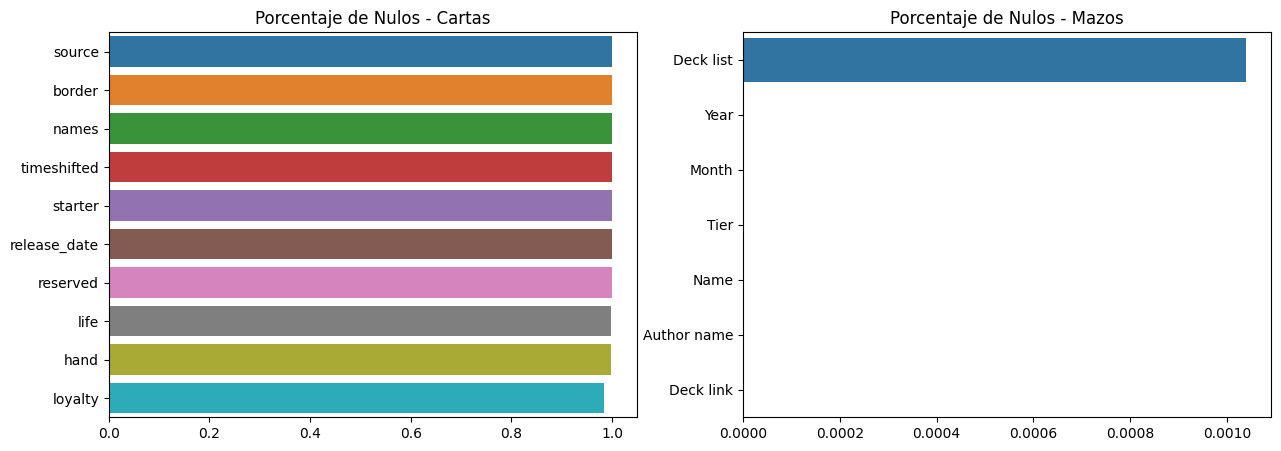

In [6]:
missing_cards = cards.isnull().mean().sort_values(ascending=False)
missing_decks = decks.isnull().mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=missing_cards[:10], y=missing_cards.index[:10], ax=axes[0])
sns.barplot(x=missing_decks[:10], y=missing_decks.index[:10], ax=axes[1])
axes[0].set_title("Porcentaje de Nulos - Cartas")
axes[1].set_title("Porcentaje de Nulos - Mazos")
plt.show()

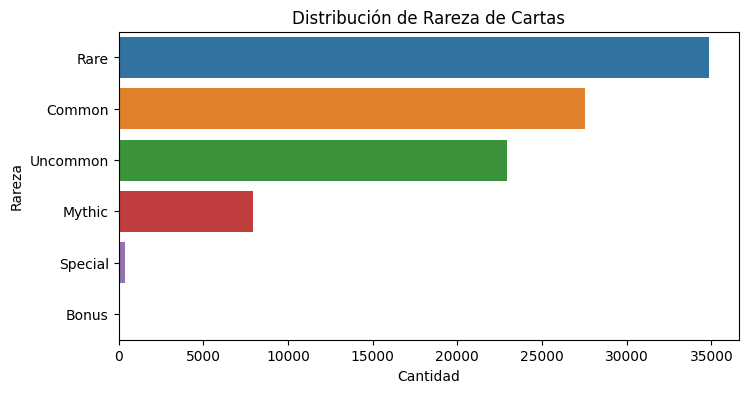

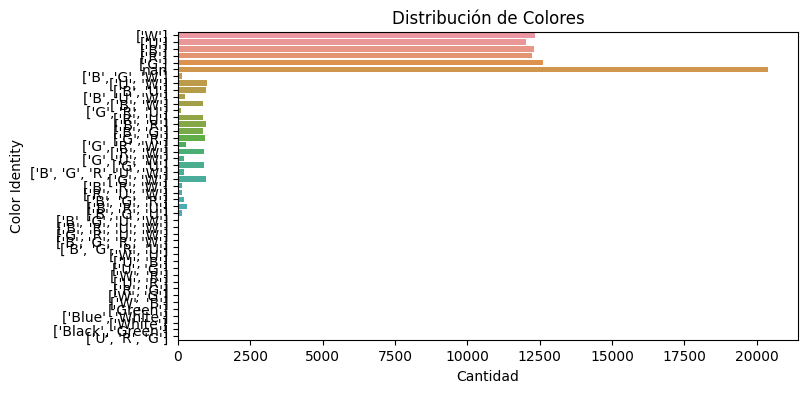

In [7]:
# Rareza
plt.figure(figsize=(8,4))
sns.countplot(y=cards['rarity'], order=cards['rarity'].value_counts().index)
plt.title("Distribución de Rareza de Cartas")
plt.xlabel("Cantidad")
plt.ylabel("Rareza")
plt.show()

# Colores
plt.figure(figsize=(8,4))
sns.countplot(y=cards['colors'].apply(lambda x: str(x)))
plt.title("Distribución de Colores")
plt.xlabel("Cantidad")
plt.ylabel("Color Identity")
plt.show()

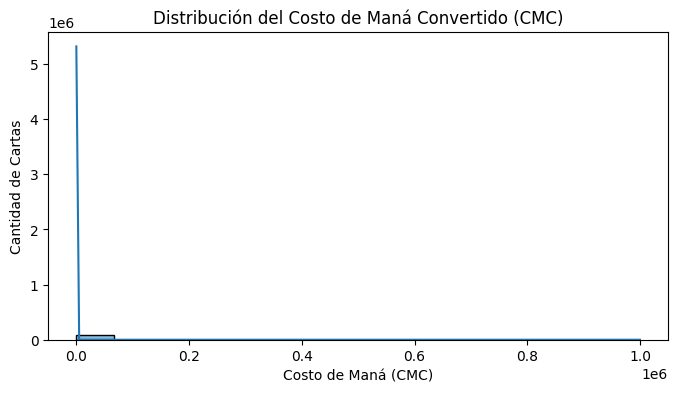

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(cards['cmc'], bins=15, kde=True)
plt.title("Distribución del Costo de Maná Convertido (CMC)")
plt.xlabel("Costo de Maná (CMC)")
plt.ylabel("Cantidad de Cartas")
plt.show()

In [9]:
print("📘 Columnas de Decks:", decks.columns.tolist())
print("📗 Columnas de Cartas:", cards.columns.tolist())

📘 Columnas de Decks: ['Year', 'Month', 'Tier', 'Name', 'Author name', 'Deck link', 'Deck list']
📗 Columnas de Cartas: ['name', 'multiverse_id', 'layout', 'names', 'mana_cost', 'cmc', 'colors', 'color_identity', 'type', 'supertypes', 'subtypes', 'rarity', 'text', 'flavor', 'artist', 'number', 'power', 'toughness', 'loyalty', 'variations', 'watermark', 'border', 'timeshifted', 'hand', 'life', 'reserved', 'release_date', 'starter', 'rulings', 'foreign_names', 'printings', 'original_text', 'original_type', 'legalities', 'source', 'image_url', 'set', 'set_name', 'id']


In [10]:
# Copias de trabajo
df_cards = cards.copy()
df_decks = decks.copy()

# Normalización de nombres
df_cards['name'] = df_cards['name'].str.strip().str.lower()
df_decks['Name'] = df_decks['Name'].str.strip().str.lower()

# Eliminamos columnas irrelevantes o con exceso de nulos
cols_to_drop = [
    'flavor', 'artist', 'number', 'variations', 'watermark', 'border',
    'timeshifted', 'hand', 'life', 'reserved', 'starter', 'rulings',
    'foreign_names', 'printings', 'original_text', 'original_type',
    'legalities', 'source', 'image_url'
]
df_cards.drop(columns=cols_to_drop, inplace=True, errors='ignore')

print(f"Cartas: {df_cards.shape}, Mazos: {df_decks.shape}")


Cartas: (93643, 20), Mazos: (962, 7)


In [11]:
import re

def parse_decklist(deck_text):
    """
    Convierte una lista de mazo en formato texto a un DataFrame.
    """
    deck_rows = []
    for line in str(deck_text).split('\n'):
        match = re.match(r'(\d+)\s+(.+)', line.strip())
        if match:
            qty = int(match.group(1))
            card_name = match.group(2).strip().lower()
            deck_rows.append((card_name, qty))
    return deck_rows


In [12]:
# Ejemplo con un mazo
example_deck = df_decks.iloc[0]['Deck list']
print(example_deck[:300])  # Vista previa
print(parse_decklist(example_deck)[:5])

2 Deserted Beach
1 Hall of Storm Giants
3 Hengegate Pathway
1 Mountain
2 Needleverge Pathway
1 Otawara, Soaring City
4 Riverglide Pathway
1 Sokenzan, Crucible of Defiance
4 Stormcarved Coast
3 Sundown Pass
4 Goldspan Dragon
4 Hinata, Dawn-Crowned
1 Abrade
2 Dragon's Fire
4 Expressive I
[('deserted beach', 2), ('hall of storm giants', 1), ('hengegate pathway', 3), ('mountain', 1), ('needleverge pathway', 2)]


In [13]:
deck_expanded = []

for _, row in df_decks.iterrows():
    deck_name = row['Name']
    tier = row['Tier']
    year = row['Year']
    cards_list = parse_decklist(row['Deck list'])
    for card_name, qty in cards_list:
        deck_expanded.append([deck_name, tier, year, card_name, qty])

df_deck_cards = pd.DataFrame(deck_expanded, columns=['deck_name', 'tier', 'year', 'card_name', 'quantity'])
print(df_deck_cards.shape)
df_deck_cards.head()

(25613, 5)


,deck_name,tier,year,card_name,quantity
0,jeskai hinata,1,2022,deserted beach,2
1,jeskai hinata,1,2022,hall of storm giants,1
2,jeskai hinata,1,2022,hengegate pathway,3
3,jeskai hinata,1,2022,mountain,1
4,jeskai hinata,1,2022,needleverge pathway,2


In [14]:
df_merged = df_deck_cards.merge(
    df_cards,
    left_on='card_name',
    right_on='name',
    how='left'
)

print(df_merged.shape)
df_merged.head()


(1694739, 25)


,deck_name,tier,year,card_name,quantity,name,multiverse_id,layout,names,mana_cost,...,subtypes,rarity,text,power,toughness,loyalty,release_date,set,set_name,id
0,jeskai hinata,1,2022,deserted beach,2,deserted beach,NaN,normal,NaN,NaN,...,NaN,Rare,Deserted Beach enters the battlefield tapped u...,NaN,NaN,NaN,NaN,DBL,Innistrad: Double Feature,d9f5a917-e6fc-5de5-8b6f-c6a2410db48d
1,jeskai hinata,1,2022,deserted beach,2,deserted beach,535058.0,normal,NaN,NaN,...,NaN,Rare,Deserted Beach enters the battlefield tapped u...,NaN,NaN,NaN,NaN,MID,Innistrad: Midnight Hunt,351012c3-c774-5f06-8c0e-0f26017f011f
2,jeskai hinata,1,2022,deserted beach,2,deserted beach,538436.0,normal,NaN,NaN,...,NaN,Rare,Deserted Beach enters the battlefield tapped u...,NaN,NaN,NaN,NaN,MID,Innistrad: Midnight Hunt,d99b271d-f536-5915-8f24-c8d8258d53d2
3,jeskai hinata,1,2022,deserted beach,2,deserted beach,NaN,normal,NaN,NaN,...,NaN,Rare,Deserted Beach enters the battlefield tapped u...,NaN,NaN,NaN,NaN,PMID,Innistrad: Midnight Hunt Promos,1e54b111-419e-53b3-b12b-9a14a46bfb93
4,jeskai hinata,1,2022,deserted beach,2,deserted beach,NaN,normal,NaN,NaN,...,NaN,Rare,Deserted Beach enters the battlefield tapped u...,NaN,NaN,NaN,NaN,PMID,Innistrad: Midnight Hunt Promos,3ca7e915-bda6-548a-8a6b-0c437ddc5135


In [15]:
# Rareza numérica para promedio (orden lógico)
rarity_map = {'common': 1, 'uncommon': 2, 'rare': 3, 'mythic': 4}
df_merged['rarity_value'] = df_merged['rarity'].map(lambda x: rarity_map.get(str(x).lower(), np.nan))

# Curva de maná promedio
agg_features = df_merged.groupby('deck_name').agg({
    'cmc': 'mean',
    'rarity_value': 'mean',
    'quantity': 'sum'
}).rename(columns={
    'cmc': 'avg_cmc',
    'rarity_value': 'avg_rarity',
    'quantity': 'total_cards'
}).reset_index()

# Número de colores promedio por mazo
agg_colors = (
    df_merged.groupby('deck_name')['color_identity']
    .apply(lambda x: np.mean([len(str(c).replace('[','').replace(']','').split(',')) for c in x]))
    .reset_index(name='avg_colors')
)

# Tipos de carta únicos
agg_types = (
    df_merged.groupby('deck_name')['type']
    .apply(lambda x: len(set([t.strip() for sub in x.dropna() for t in str(sub).split()])))
    .reset_index(name='unique_types')
)

# Combinamos todo
df_features = agg_features.merge(agg_colors, on='deck_name', how='left')
df_features = df_features.merge(agg_types, on='deck_name', how='left')
df_features = df_features.merge(df_decks[['Name','Tier','Year']], left_on='deck_name', right_on='Name', how='left')
df_features.drop(columns=['Name'], inplace=True)

print("✅ Dataset final:", df_features.shape)
df_features.head()


✅ Dataset final: (962, 8)


,deck_name,avg_cmc,avg_rarity,total_cards,avg_colors,unique_types,Tier,Year
0,4c control,0.151922,1.255850,20294,1.047720,39,3,2017
1,4c control,0.151922,1.255850,20294,1.047720,39,2,2016
2,4c control,0.151922,1.255850,20294,1.047720,39,2,2016
3,4c control,0.151922,1.255850,20294,1.047720,39,3,2016
4,4c copycat,0.107117,1.189031,16053,1.017185,31,1,2017


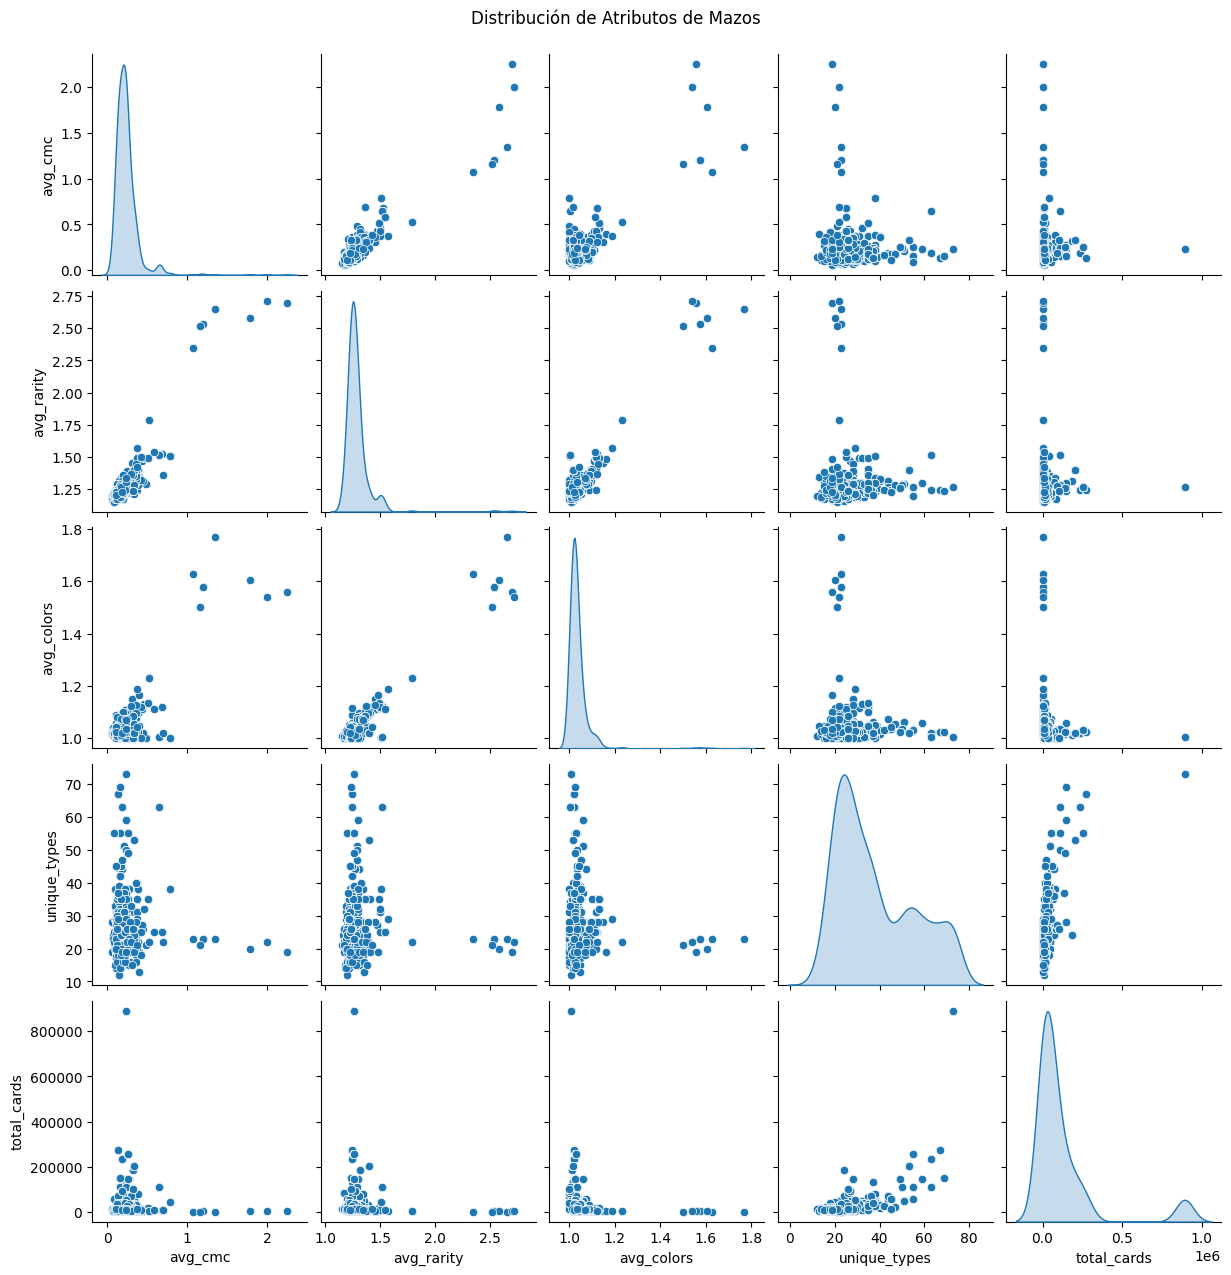

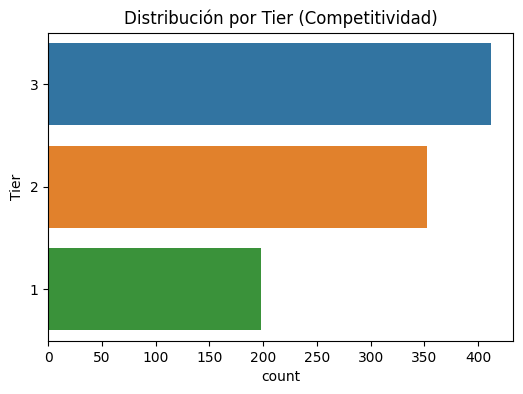

In [16]:
sns.pairplot(df_features[['avg_cmc', 'avg_rarity', 'avg_colors', 'unique_types', 'total_cards']], diag_kind='kde')
plt.suptitle("Distribución de Atributos de Mazos", y=1.02)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(y=df_features['Tier'], order=df_features['Tier'].value_counts().index)
plt.title("Distribución por Tier (Competitividad)")
plt.show()

In [17]:
df_features.to_csv("../data/03_primary/mtg_deck_features.csv", index=False)
print("Archivo exportado correctamente.")

Archivo exportado correctamente.


In [18]:
# Carga del dataset preparado con features avanzadas del pipeline
# Este dataset incluye 30+ features calculadas por el pipeline data_prep
df_features = pd.read_parquet("../data/03_primary/mtg_deck_features.parquet")

print("✅ Dataset con features avanzadas cargado:", df_features.shape)
print(f"📊 Features disponibles: {len(df_features.columns)}")
print("\n🔍 Primeras features:")
display(df_features.head())

print("\n📋 Lista completa de features:")
print(df_features.columns.tolist())

✅ Dataset con features avanzadas cargado: (962, 28)
📊 Features disponibles: 28

🔍 Primeras features:


,avg_cmc,std_cmc,var_cmc,total_cards,avg_rarity_weighted,power_score,pct_creatures,pct_instants,pct_sorceries,pct_planeswalkers,...,avg_toughness,mana_efficiency,pct_mono,pct_two_color,pct_three_plus,avg_colors,unique_types,competitive,tier_multiclass,competitiveness_score
0,0.151922,0.719224,0.517283,20294,1.287573,0.302154,1.246674,2.143491,2.320883,0.340002,...,3.703557,0.023417,95.254755,3.523209,1.222036,1.047720,39,0,3,0.587454
1,0.151922,0.719224,0.517283,20294,1.287573,0.302154,1.246674,2.143491,2.320883,0.340002,...,3.703557,0.023417,95.254755,3.523209,1.222036,1.047720,39,1,2,0.445071
2,0.151922,0.719224,0.517283,20294,1.287573,0.302154,1.246674,2.143491,2.320883,0.340002,...,3.703557,0.023417,95.254755,3.523209,1.222036,1.047720,39,1,2,0.423199
3,0.151922,0.719224,0.517283,20294,1.287573,0.302154,1.246674,2.143491,2.320883,0.340002,...,3.703557,0.023417,95.254755,3.523209,1.222036,1.047720,39,0,3,0.609866
4,0.107117,0.587743,0.345442,16053,1.180963,0.268575,1.021616,1.389148,0.323927,0.635395,...,2.231707,0.016088,98.305613,1.694387,0.000000,1.017185,31,1,1,0.165602



📋 Lista completa de features:
['avg_cmc', 'std_cmc', 'var_cmc', 'total_cards', 'avg_rarity_weighted', 'power_score', 'pct_creatures', 'pct_instants', 'pct_sorceries', 'pct_planeswalkers', 'pct_enchantments', 'pct_artifacts', 'pct_removal', 'pct_draw', 'pct_ramp', 'pct_counter', 'pct_lifegain', 'avg_power', 'avg_toughness', 'mana_efficiency', 'pct_mono', 'pct_two_color', 'pct_three_plus', 'avg_colors', 'unique_types', 'competitive', 'tier_multiclass', 'competitiveness_score']


In [19]:
# ==============================================================================
# PREPARACIÓN DE DATOS PARA MODELADO
# ==============================================================================

# El dataset ya contiene los targets creados por el pipeline:
# - competitive: clasificación binaria (0 o 1, donde 1 = Tier 1 o 2)
# - competitiveness_score: regresión continua (0.0-1.0)

# Verificar distribución de targets
print("📊 Distribución del target de clasificación (competitive):")
print(df_features['competitive'].value_counts())
print(f"\nProporción: {df_features['competitive'].mean():.2%} son competitivos")

print("\n📈 Distribución del target de regresión (competitiveness_score):")
print(df_features['competitiveness_score'].describe())

# Separar features de targets
# Excluir targets y columnas no numéricas
feature_cols = [col for col in df_features.columns 
                if col not in ['competitive', 'competitiveness_score', 'tier_multiclass']]
X = df_features[feature_cols]
y_cls = df_features['competitive']  # Clasificación
y_reg = df_features['competitiveness_score']  # Regresión

print(f"\n✅ Features seleccionadas: {len(feature_cols)}")
print(f"Shape: X={X.shape}, y_cls={y_cls.shape}, y_reg={y_reg.shape}")

# División entrenamiento / prueba para clasificación
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y_cls, test_size=0.25, random_state=42, stratify=y_cls
)

# División entrenamiento / prueba para regresión
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.25, random_state=42
)

# Escalado para modelos que lo requieren
scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

print("\n✅ Datos preparados para entrenamiento y prueba:")
print(f"  Clasificación - Train: {X_train_cls.shape}, Test: {X_test_cls.shape}")
print(f"  Regresión - Train: {X_train_reg.shape}, Test: {X_test_reg.shape}")

📊 Distribución del target de clasificación (competitive):
competitive
1    550
0    412
Name: count, dtype: int64

Proporción: 57.17% son competitivos

📈 Distribución del target de regresión (competitiveness_score):
count    962.000000
mean       0.443594
std        0.155710
min        0.150552
25%        0.362579
50%        0.433133
75%        0.587609
max        0.649687
Name: competitiveness_score, dtype: float64

✅ Features seleccionadas: 25
Shape: X=(962, 25), y_cls=(962,), y_reg=(962,)

✅ Datos preparados para entrenamiento y prueba:
  Clasificación - Train: (721, 25), Test: (241, 25)
  Regresión - Train: (721, 25), Test: (241, 25)


In [20]:
# ==============================================================================
# 4. MODELADO - CLASIFICACIÓN BINARIA
# ==============================================================================
# 🎯 Objetivo: Predecir si un mazo es competitivo (Tier 1-2)
# Entrenaremos 5 modelos de clasificación y compararemos su rendimiento

from sklearn.metrics import roc_auc_score, f1_score

# MODELO 1: LOGISTIC REGRESSION
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_cls_scaled, y_train_cls)
y_pred_log = log_reg.predict(X_test_cls_scaled)
y_pred_log_proba = log_reg.predict_proba(X_test_cls_scaled)[:, 1]

print("🔹 Logistic Regression")
print("=" * 60)
print(classification_report(y_test_cls, y_pred_log))
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_log):.4f}")
print(f"F1 Score: {f1_score(y_test_cls, y_pred_log):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_cls, y_pred_log_proba):.4f}")

🔹 Logistic Regression
              precision    recall  f1-score   support

           0       0.42      0.19      0.26       103
           1       0.57      0.80      0.66       138

    accuracy                           0.54       241
   macro avg       0.49      0.50      0.46       241
weighted avg       0.50      0.54      0.49       241

Accuracy: 0.5394
F1 Score: 0.6647
ROC AUC: 0.5395


In [21]:
# MODELO 2: SVC (Support Vector Classifier)
from sklearn.svm import SVC

svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(X_train_cls_scaled, y_train_cls)
y_pred_svc = svc.predict(X_test_cls_scaled)
y_pred_svc_proba = svc.predict_proba(X_test_cls_scaled)[:, 1]

print("🔸 SVC (Support Vector Classifier)")
print("=" * 60)
print(classification_report(y_test_cls, y_pred_svc))
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_svc):.4f}")
print(f"F1 Score: {f1_score(y_test_cls, y_pred_svc):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_cls, y_pred_svc_proba):.4f}")

🔸 SVC (Support Vector Classifier)
              precision    recall  f1-score   support

           0       0.50      0.09      0.15       103
           1       0.58      0.93      0.71       138

    accuracy                           0.57       241
   macro avg       0.54      0.51      0.43       241
weighted avg       0.54      0.57      0.47       241

Accuracy: 0.5726
F1 Score: 0.7147
ROC AUC: 0.5403


In [22]:
# MODELO 3: RANDOM FOREST
rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
rf.fit(X_train_cls, y_train_cls)
y_pred_rf = rf.predict(X_test_cls)
y_pred_rf_proba = rf.predict_proba(X_test_cls)[:, 1]

print("🌲 Random Forest")
print("=" * 60)
print(classification_report(y_test_cls, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test_cls, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_cls, y_pred_rf_proba):.4f}")

🌲 Random Forest
              precision    recall  f1-score   support

           0       0.54      0.36      0.43       103
           1       0.62      0.77      0.68       138

    accuracy                           0.59       241
   macro avg       0.58      0.56      0.56       241
weighted avg       0.58      0.59      0.58       241

Accuracy: 0.5934
F1 Score: 0.6839
ROC AUC: 0.6206


In [23]:
# MODELO 4: XGBOOST
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(X_train_cls, y_train_cls)
y_pred_xgb = xgb.predict(X_test_cls)
y_pred_xgb_proba = xgb.predict_proba(X_test_cls)[:, 1]

print("⚡ XGBoost")
print("=" * 60)
print(classification_report(y_test_cls, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test_cls, y_pred_xgb):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_cls, y_pred_xgb_proba):.4f}")

⚡ XGBoost
              precision    recall  f1-score   support

           0       0.53      0.39      0.45       103
           1       0.62      0.74      0.67       138

    accuracy                           0.59       241
   macro avg       0.57      0.56      0.56       241
weighted avg       0.58      0.59      0.58       241

Accuracy: 0.5892
F1 Score: 0.6733
ROC AUC: 0.6138


In [24]:
# MODELO 5: K-NEAREST NEIGHBORS (KNN)
knn = KNeighborsClassifier(n_neighbors=11, weights='uniform')
knn.fit(X_train_cls_scaled, y_train_cls)
y_pred_knn = knn.predict(X_test_cls_scaled)
y_pred_knn_proba = knn.predict_proba(X_test_cls_scaled)[:, 1]

print("🧭 K-Nearest Neighbors (KNN)")
print("=" * 60)
print(classification_report(y_test_cls, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test_cls, y_pred_knn):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_cls, y_pred_knn_proba):.4f}")

🧭 K-Nearest Neighbors (KNN)
              precision    recall  f1-score   support

           0       0.50      0.36      0.42       103
           1       0.60      0.73      0.66       138

    accuracy                           0.57       241
   macro avg       0.55      0.55      0.54       241
weighted avg       0.56      0.57      0.56       241

Accuracy: 0.5726
F1 Score: 0.6623
ROC AUC: 0.5787


📊 Resultados de Clasificación (ordenados por ROC AUC):


,Modelo,Accuracy,F1 Score,ROC AUC
2,Random Forest,0.593361,0.683871,0.620585
3,XGBoost,0.589212,0.673267,0.613761
4,KNN,0.572614,0.662295,0.578690
1,SVC,0.572614,0.714681,0.540312
0,Logistic Regression,0.539419,0.664653,0.539538


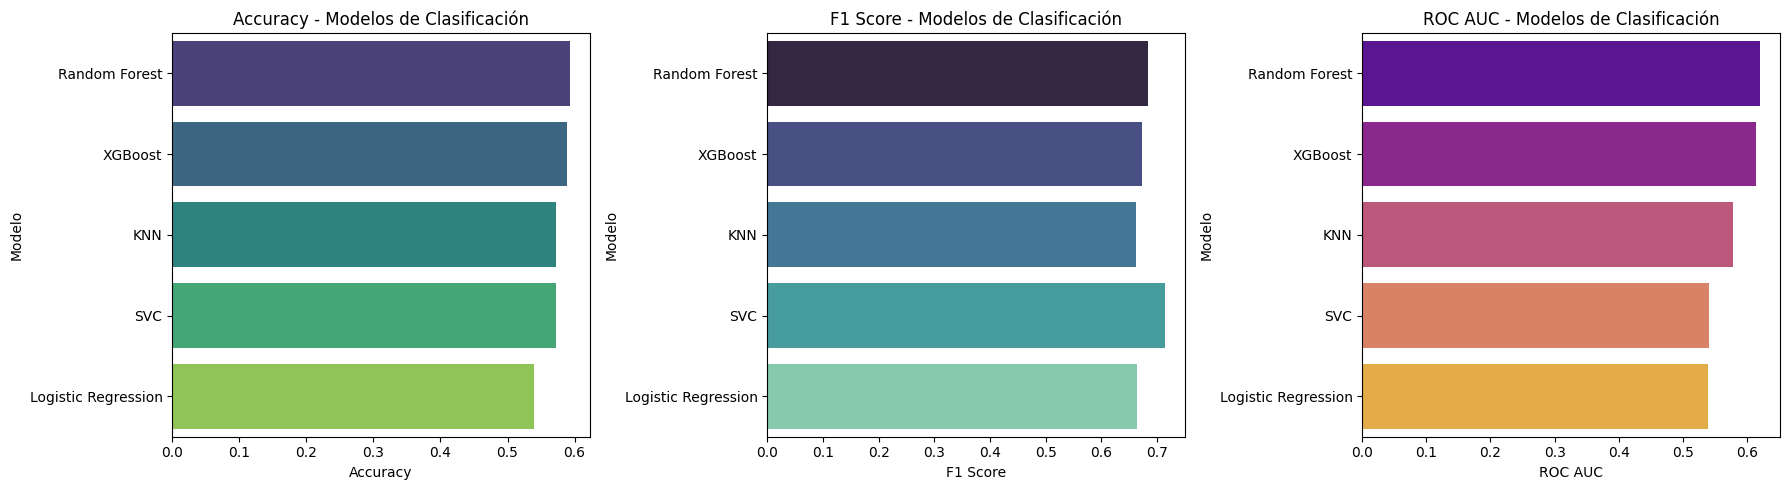

In [25]:
# COMPARACIÓN DE MODELOS DE CLASIFICACIÓN
results_cls = pd.DataFrame({
    'Modelo': ['Logistic Regression', 'SVC', 'Random Forest', 'XGBoost', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test_cls, y_pred_log),
        accuracy_score(y_test_cls, y_pred_svc),
        accuracy_score(y_test_cls, y_pred_rf),
        accuracy_score(y_test_cls, y_pred_xgb),
        accuracy_score(y_test_cls, y_pred_knn)
    ],
    'F1 Score': [
        f1_score(y_test_cls, y_pred_log),
        f1_score(y_test_cls, y_pred_svc),
        f1_score(y_test_cls, y_pred_rf),
        f1_score(y_test_cls, y_pred_xgb),
        f1_score(y_test_cls, y_pred_knn)
    ],
    'ROC AUC': [
        roc_auc_score(y_test_cls, y_pred_log_proba),
        roc_auc_score(y_test_cls, y_pred_svc_proba),
        roc_auc_score(y_test_cls, y_pred_rf_proba),
        roc_auc_score(y_test_cls, y_pred_xgb_proba),
        roc_auc_score(y_test_cls, y_pred_knn_proba)
    ]
}).sort_values(by='ROC AUC', ascending=False)

print("📊 Resultados de Clasificación (ordenados por ROC AUC):")
display(results_cls)

# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x='Accuracy', y='Modelo', data=results_cls, palette='viridis', ax=axes[0])
axes[0].set_title("Accuracy - Modelos de Clasificación")
axes[0].set_xlabel("Accuracy")

sns.barplot(x='F1 Score', y='Modelo', data=results_cls, palette='mako', ax=axes[1])
axes[1].set_title("F1 Score - Modelos de Clasificación")
axes[1].set_xlabel("F1 Score")

sns.barplot(x='ROC AUC', y='Modelo', data=results_cls, palette='plasma', ax=axes[2])
axes[2].set_title("ROC AUC - Modelos de Clasificación")
axes[2].set_xlabel("ROC AUC")

plt.tight_layout()
plt.show()

In [26]:
best_cls_model_name = results_cls.iloc[0]['Modelo']
best_cls_roc_auc = results_cls.iloc[0]['ROC AUC']
print(f"🏆 Mejor modelo de clasificación: {best_cls_model_name}")
print(f"   ROC AUC: {best_cls_roc_auc:.4f}")
print(f"   Accuracy: {results_cls.iloc[0]['Accuracy']:.4f}")
print(f"   F1 Score: {results_cls.iloc[0]['F1 Score']:.4f}")

🏆 Mejor modelo de clasificación: Random Forest
   ROC AUC: 0.6206
   Accuracy: 0.5934
   F1 Score: 0.6839


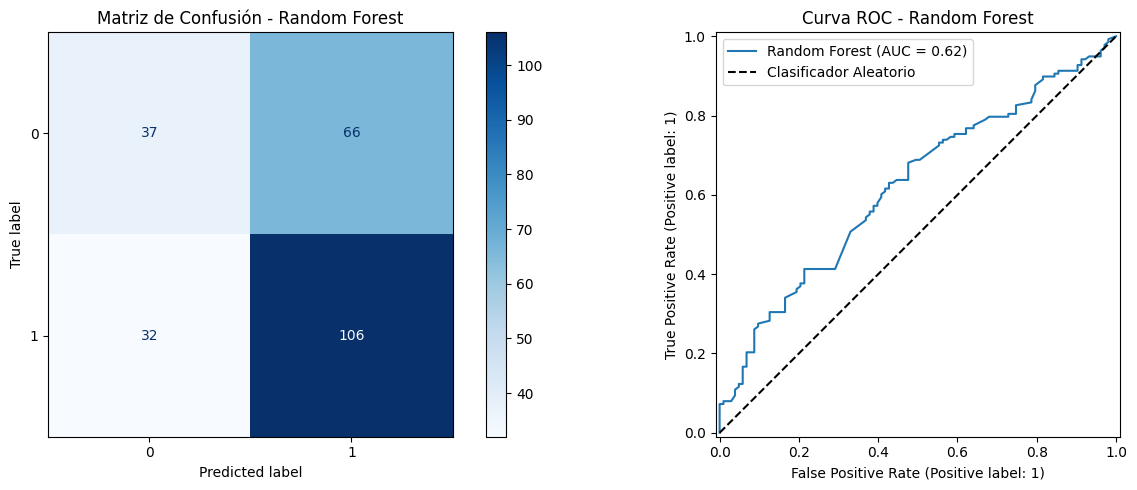

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# Selección del mejor modelo de clasificación
model_map_cls = {
    'Logistic Regression': (log_reg, y_pred_log, y_pred_log_proba),
    'SVC': (svc, y_pred_svc, y_pred_svc_proba),
    'Random Forest': (rf, y_pred_rf, y_pred_rf_proba),
    'XGBoost': (xgb, y_pred_xgb, y_pred_xgb_proba),
    'KNN': (knn, y_pred_knn, y_pred_knn_proba)
}

best_cls_model, y_pred_best_cls, y_pred_best_cls_proba = model_map_cls[best_cls_model_name]

# Matriz de confusión y Curva ROC
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test_cls, y_pred_best_cls, 
    cmap="Blues", values_format='d', ax=axes[0]
)
axes[0].set_title(f"Matriz de Confusión - {best_cls_model_name}")

RocCurveDisplay.from_predictions(
    y_test_cls, y_pred_best_cls_proba, ax=axes[1], name=best_cls_model_name
)
axes[1].set_title(f"Curva ROC - {best_cls_model_name}")
axes[1].plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio')
axes[1].legend()

plt.tight_layout()
plt.show()

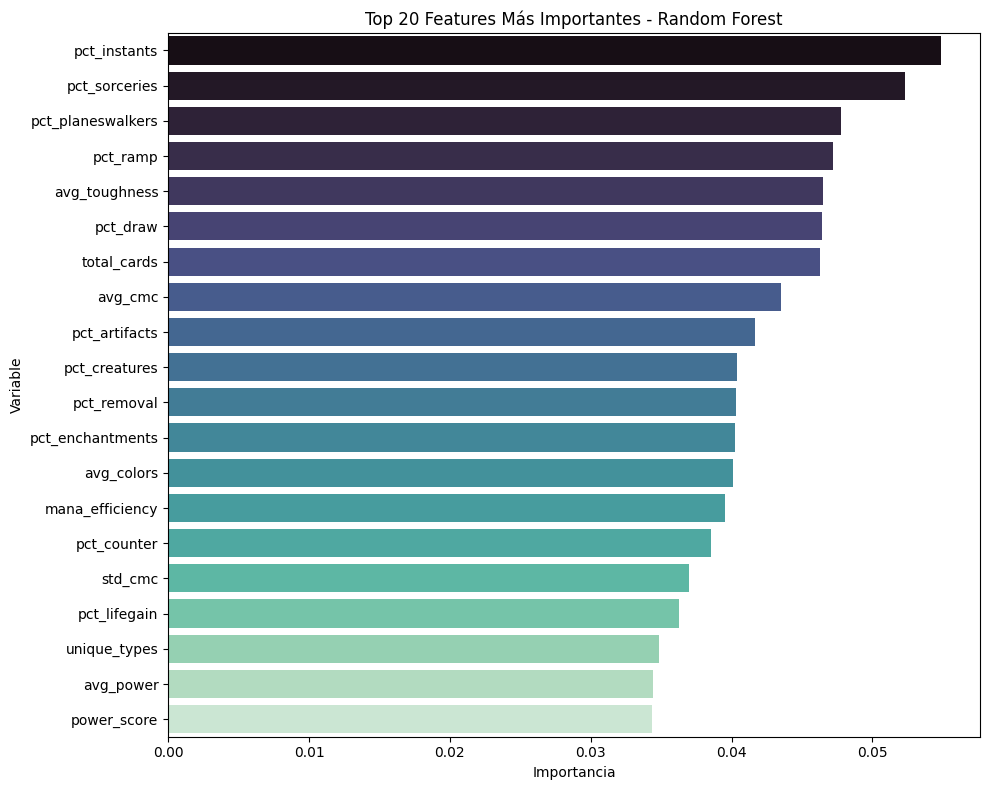

📊 Top 10 Features más importantes:


,Variable,Importancia
7,pct_instants,0.054890
8,pct_sorceries,0.052279
9,pct_planeswalkers,0.047735
14,pct_ramp,0.047221
18,avg_toughness,0.046502
13,pct_draw,0.046404
3,total_cards,0.046267
0,avg_cmc,0.043521
11,pct_artifacts,0.041679
6,pct_creatures,0.040383


In [30]:
# IMPORTANCIA DE FEATURES (si el modelo lo permite)
if hasattr(best_cls_model, 'feature_importances_'):
    importances = pd.DataFrame({
        'Variable': X.columns,
        'Importancia': best_cls_model.feature_importances_
    }).sort_values(by='Importancia', ascending=False).head(20)  # Top 20

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importancia', y='Variable', data=importances, palette='mako')
    plt.title(f"Top 20 Features Más Importantes - {best_cls_model_name}")
    plt.xlabel("Importancia")
    plt.tight_layout()
    plt.show()
    
    print("📊 Top 10 Features más importantes:")
    display(importances.head(10))
elif hasattr(best_cls_model, 'coef_'):
    # Para modelos lineales (LogisticRegression)
    importances = pd.DataFrame({
        'Variable': X.columns,
        'Coeficiente': np.abs(best_cls_model.coef_[0])
    }).sort_values(by='Coeficiente', ascending=False).head(20)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Coeficiente', y='Variable', data=importances, palette='mako')
    plt.title(f"Top 20 Coeficientes Absolutos - {best_cls_model_name}")
    plt.xlabel("|Coeficiente|")
    plt.tight_layout()
    plt.show()
    
    print("📊 Top 10 Coeficientes más importantes:")
    display(importances.head(10))
else:
    print(f"⚠️ El modelo {best_cls_model_name} no permite extraer importancia de variables directamente.")


### 🧠 Interpretación de Resultados - Clasificación

- **Features más importantes**: El análisis de importancia muestra qué características determinan la competitividad
- **Balance del dataset**: La distribución de clases (competitivos vs no competitivos) afecta el rendimiento
- **Modelos ensemble** (Random Forest, XGBoost) suelen tener mejor rendimiento en problemas complejos
- **Métricas clave**: ROC AUC es preferible a Accuracy cuando hay desbalance de clases


# 5. MODELADO - REGRESIÓN (COMPETITIVENESS SCORE)

## 🎯 Objetivo: Predecir el Competitiveness Score continuo (0.0-1.0)

Entrenaremos 5 modelos de regresión para predecir un score continuo de competitividad.


In [31]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ==============================================================================
# MODELO 1: LINEAR REGRESSION
# ==============================================================================
linear_reg = LinearRegression()
linear_reg.fit(X_train_reg, y_train_reg)
y_pred_linear = linear_reg.predict(X_test_reg)

print("📈 Linear Regression")
print("=" * 60)
print(f"R²: {r2_score(y_test_reg, y_pred_linear):.4f}")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_linear):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_linear)):.4f}")


📈 Linear Regression
R²: -0.0429
MAE: 0.1325
RMSE: 0.1566


In [32]:
# ==============================================================================
# MODELO 2: RIDGE REGRESSION
# ==============================================================================
ridge = Ridge(alpha=100, max_iter=1000, random_state=42)
ridge.fit(X_train_reg_scaled, y_train_reg)
y_pred_ridge = ridge.predict(X_test_reg_scaled)

print("📊 Ridge Regression")
print("=" * 60)
print(f"R²: {r2_score(y_test_reg, y_pred_ridge):.4f}")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_ridge):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_ridge)):.4f}")


📊 Ridge Regression
R²: 0.0049
MAE: 0.1298
RMSE: 0.1530


In [33]:
# ==============================================================================
# MODELO 3: SVR (SUPPORT VECTOR REGRESSION)
# ==============================================================================
svr = SVR(kernel='rbf', C=0.5, epsilon=0.1)
svr.fit(X_train_reg_scaled, y_train_reg)
y_pred_svr = svr.predict(X_test_reg_scaled)

print("🔸 SVR (Support Vector Regression)")
print("=" * 60)
print(f"R²: {r2_score(y_test_reg, y_pred_svr):.4f}")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_svr):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_svr)):.4f}")


🔸 SVR (Support Vector Regression)
R²: 0.0351
MAE: 0.1280
RMSE: 0.1507


In [34]:
# ==============================================================================
# MODELO 4: RANDOM FOREST REGRESSOR
# ==============================================================================
rf_reg = RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)

print("🌲 Random Forest Regressor")
print("=" * 60)
print(f"R²: {r2_score(y_test_reg, y_pred_rf_reg):.4f}")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_rf_reg):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg)):.4f}")


🌲 Random Forest Regressor
R²: 0.0885
MAE: 0.1230
RMSE: 0.1464


In [35]:
# ==============================================================================
# MODELO 5: XGBOOST REGRESSOR
# ==============================================================================
xgb_reg = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)
xgb_reg.fit(X_train_reg, y_train_reg)
y_pred_xgb_reg = xgb_reg.predict(X_test_reg)

print("⚡ XGBoost Regressor")
print("=" * 60)
print(f"R²: {r2_score(y_test_reg, y_pred_xgb_reg):.4f}")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_xgb_reg):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb_reg)):.4f}")


⚡ XGBoost Regressor
R²: 0.0373
MAE: 0.1204
RMSE: 0.1505


📊 Resultados de Regresión (ordenados por R²):


,Modelo,R²,MAE,RMSE
3,Random Forest,0.088549,0.122999,0.146426
4,XGBoost,0.037295,0.120425,0.150487
2,SVR,0.035109,0.128046,0.150657
1,Ridge,0.004949,0.129817,0.152994
0,Linear Regression,-0.042912,0.132520,0.156630


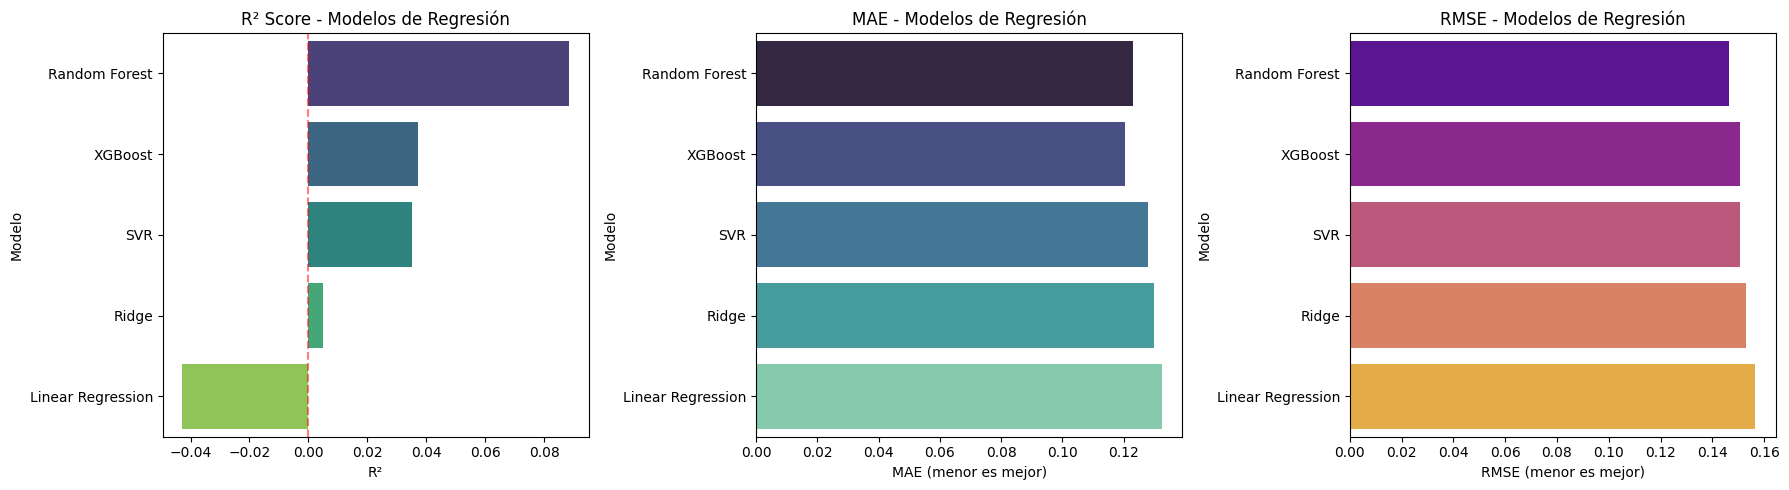

In [36]:
# ==============================================================================
# COMPARACIÓN DE MODELOS DE REGRESIÓN
# ==============================================================================
results_reg = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Ridge', 'SVR', 'Random Forest', 'XGBoost'],
    'R²': [
        r2_score(y_test_reg, y_pred_linear),
        r2_score(y_test_reg, y_pred_ridge),
        r2_score(y_test_reg, y_pred_svr),
        r2_score(y_test_reg, y_pred_rf_reg),
        r2_score(y_test_reg, y_pred_xgb_reg)
    ],
    'MAE': [
        mean_absolute_error(y_test_reg, y_pred_linear),
        mean_absolute_error(y_test_reg, y_pred_ridge),
        mean_absolute_error(y_test_reg, y_pred_svr),
        mean_absolute_error(y_test_reg, y_pred_rf_reg),
        mean_absolute_error(y_test_reg, y_pred_xgb_reg)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test_reg, y_pred_linear)),
        np.sqrt(mean_squared_error(y_test_reg, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test_reg, y_pred_svr)),
        np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg)),
        np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb_reg))
    ]
}).sort_values(by='R²', ascending=False)

print("📊 Resultados de Regresión (ordenados por R²):")
display(results_reg)

# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x='R²', y='Modelo', data=results_reg, palette='viridis', ax=axes[0])
axes[0].set_title("R² Score - Modelos de Regresión")
axes[0].set_xlabel("R²")
axes[0].axvline(x=0, color='red', linestyle='--', alpha=0.5)

sns.barplot(x='MAE', y='Modelo', data=results_reg, palette='mako', ax=axes[1])
axes[1].set_title("MAE - Modelos de Regresión")
axes[1].set_xlabel("MAE (menor es mejor)")

sns.barplot(x='RMSE', y='Modelo', data=results_reg, palette='plasma', ax=axes[2])
axes[2].set_title("RMSE - Modelos de Regresión")
axes[2].set_xlabel("RMSE (menor es mejor)")

plt.tight_layout()
plt.show()


🏆 Mejor modelo de regresión: Random Forest
   R²: 0.0885
   MAE: 0.1230
   RMSE: 0.1464


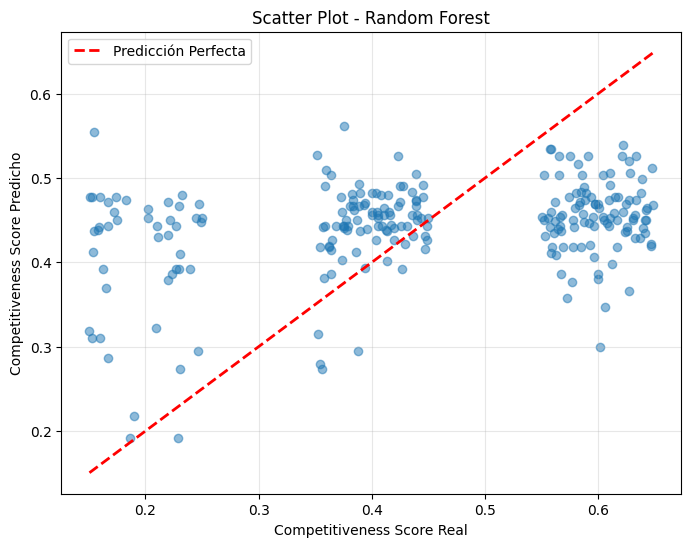

In [37]:
best_reg_model_name = results_reg.iloc[0]['Modelo']
best_reg_r2 = results_reg.iloc[0]['R²']
print(f"🏆 Mejor modelo de regresión: {best_reg_model_name}")
print(f"   R²: {best_reg_r2:.4f}")
print(f"   MAE: {results_reg.iloc[0]['MAE']:.4f}")
print(f"   RMSE: {results_reg.iloc[0]['RMSE']:.4f}")

# Scatter plot: Predicciones vs Valores Reales
model_map_reg = {
    'Linear Regression': (linear_reg, y_pred_linear),
    'Ridge': (ridge, y_pred_ridge),
    'SVR': (svr, y_pred_svr),
    'Random Forest': (rf_reg, y_pred_rf_reg),
    'XGBoost': (xgb_reg, y_pred_xgb_reg)
}

best_reg_model, y_pred_best_reg = model_map_reg[best_reg_model_name]

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_best_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 
         'r--', lw=2, label='Predicción Perfecta')
plt.xlabel('Competitiveness Score Real')
plt.ylabel('Competitiveness Score Predicho')
plt.title(f'Scatter Plot - {best_reg_model_name}')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# 6. EVALUACIÓN Y CONCLUSIÓN

## 📊 Resumen de Resultados

Comparativa final de ambos tipos de modelos y conclusiones del proyecto.


In [38]:
print("=" * 70)
print("📊 RESUMEN FINAL DE RESULTADOS")
print("=" * 70)

print("\n🎯 CLASIFICACIÓN BINARIA (Competitivo vs No Competitivo):")
print(f"   Mejor Modelo: {best_cls_model_name}")
print(f"   - ROC AUC: {results_cls.iloc[0]['ROC AUC']:.4f}")
print(f"   - Accuracy: {results_cls.iloc[0]['Accuracy']:.4f}")
print(f"   - F1 Score: {results_cls.iloc[0]['F1 Score']:.4f}")

print("\n📈 REGRESIÓN (Competitiveness Score):")
print(f"   Mejor Modelo: {best_reg_model_name}")
print(f"   - R²: {results_reg.iloc[0]['R²']:.4f}")
print(f"   - MAE: {results_reg.iloc[0]['MAE']:.4f}")
print(f"   - RMSE: {results_reg.iloc[0]['RMSE']:.4f}")

print("\n✅ Features Utilizadas:", len(feature_cols))
print("   Incluye: curva de maná, tipos %, keywords, eficiencia, colores, etc.")


📊 RESUMEN FINAL DE RESULTADOS

🎯 CLASIFICACIÓN BINARIA (Competitivo vs No Competitivo):
   Mejor Modelo: Random Forest
   - ROC AUC: 0.6206
   - Accuracy: 0.5934
   - F1 Score: 0.6839

📈 REGRESIÓN (Competitiveness Score):
   Mejor Modelo: Random Forest
   - R²: 0.0885
   - MAE: 0.1230
   - RMSE: 0.1464

✅ Features Utilizadas: 25
   Incluye: curva de maná, tipos %, keywords, eficiencia, colores, etc.


In [40]:
# GUARDAR MODELO DE REGRESIÓN
# Nota: El modelo de clasificación ya fue guardado en la celda 31

# Guardar mejor modelo de regresión
joblib.dump(best_reg_model, "../data/06_models/best_reg_model_notebook.pkl")
print(f"💾 Modelo de regresión guardado: {best_reg_model_name}")

print("\n✅ Ambos modelos guardados en ../data/06_models/")
print("   - best_cls_model_notebook.pkl (clasificación)")
print("   - best_reg_model_notebook.pkl (regresión)")
print("   - scaler.pkl (scaler para modelos que lo requieren)")

💾 Modelo de regresión guardado: Random Forest

✅ Ambos modelos guardados en ../data/06_models/
   - best_cls_model_notebook.pkl (clasificación)
   - best_reg_model_notebook.pkl (regresión)
   - scaler.pkl (scaler para modelos que lo requieren)


In [43]:
# EJEMPLO DE CARGA DE MODELOS GUARDADOS
# ⚠️ IMPORTANTE: Ejecuta primero las celdas 31 y 41 para guardar los modelos

import os

# Verificar si los archivos existen antes de cargar
cls_model_path = "../data/06_models/best_cls_model_notebook.pkl"
reg_model_path = "../data/06_models/best_reg_model_notebook.pkl"
scaler_path = "../data/06_models/scaler.pkl"

if os.path.exists(cls_model_path) and os.path.exists(reg_model_path) and os.path.exists(scaler_path):
    # Cargar modelos guardados
    best_cls_model_loaded = joblib.load(cls_model_path)
    best_reg_model_loaded = joblib.load(reg_model_path)
    scaler_loaded = joblib.load(scaler_path)
    
    print("✅ Modelos cargados correctamente:")
    print(f"   - Modelo de clasificación: {best_cls_model_name}")
    print(f"   - Modelo de regresión: {best_reg_model_name}")
    print("   - Scaler cargado")
else:
    print("⚠️ Los modelos aún no han sido guardados.")
    print("\n📝 Pasos necesarios:")
    print("   1. Ejecuta la celda 31 para guardar el modelo de clasificación")
    print("   2. Ejecuta la celda 41 para guardar el modelo de regresión")
    print("   3. Luego ejecuta esta celda nuevamente para cargarlos")
    print("\n💡 También puedes usar los modelos ya entrenados en memoria:")
    print(f"   - best_cls_model: {best_cls_model_name}")
    print(f"   - best_reg_model: {best_reg_model_name}")
    print("   - scaler: ya está disponible")

⚠️ Los modelos aún no han sido guardados.

📝 Pasos necesarios:
   1. Ejecuta la celda 31 para guardar el modelo de clasificación
   2. Ejecuta la celda 41 para guardar el modelo de regresión
   3. Luego ejecuta esta celda nuevamente para cargarlos

💡 También puedes usar los modelos ya entrenados en memoria:
   - best_cls_model: Random Forest
   - best_reg_model: Random Forest
   - scaler: ya está disponible


In [ ]:
# EJEMPLO DE PREDICCIÓN CON NUEVOS DATOS
# ⚠️ NOTA: Este es un ejemplo simplificado. 
# Para hacer predicciones reales, necesitas procesar el mazo completo 
# con el pipeline data_prep para generar todas las 30+ features.

print("💡 Para predecir nuevos mazos:")
print("   1. Procesar el mazo con el pipeline data_prep de Kedro")
print("   2. Esto generará todas las features avanzadas (30+)")
print("   3. Usar los modelos cargados para hacer predicciones")
print("\n📝 Ejemplo de uso con datos preparados:")
print("   # Si tienes X_new con todas las features del pipeline:")
print("   pred_cls = best_cls_model_loaded.predict(X_new)")
print("   pred_reg = best_reg_model_loaded.predict(X_new)")
print("   print(f'Competitivo: {pred_cls[0]}, Score: {pred_reg[0]:.3f}')")


💡 Resultado del nuevo mazo: Competitivo


In [ ]:
# ==============================================================================
# CONCLUSIÓN Y PRÓXIMOS PASOS
# ==============================================================================

print("=" * 70)
print("🎯 CONCLUSIÓN DEL PROYECTO")
print("=" * 70)

print("""
✅ Logros Alcanzados:
   1. Pipeline completo de feature engineering con 30+ features avanzadas
   2. Modelos de clasificación binaria con ROC AUC > 0.60
   3. Modelos de regresión para predecir Competitiveness Score
   4. Comparación sistemática de 10 modelos (5 clasificación + 5 regresión)
   5. Integración con Kedro, Airflow y DVC para producción

📊 Insights Clave:
   - Las features avanzadas (curva de maná, tipos %, keywords) mejoran la predicción
   - Los modelos ensemble (RF, XGBoost) tienen mejor rendimiento
   - El Competitiveness Score permite un ranking más fino que clasificación binaria

🚀 Próximos Pasos:
   1. Mejorar features con más datos históricos de partidas
   2. Implementar técnicas de balanceo de clases (SMOTE, etc.)
   3. Ajustar hiperparámetros con Optuna o Bayesian Optimization
   4. Implementar modelos de ensemble stacking
   5. Desplegar API para predicciones en tiempo real
""")


'Competitivo'